# Training NNs

#### Motivation. 
This is designed to familiarize you with using ML frameworks for deep learning. In particular, there are the following learning goals:

* Practice writing code that implements neural network training with tensorflow
* Evaluate multiple optimization methds for training.
* Explore hand-tuning for hyperparameter optimization.
* It builds on the previous assignment but requires a higher level of mastery of deep learning theory and programming/engineering skills. In particular, you will experience training a much deeper network on a large-scale dataset. You will encounter practical issues that help you consolidate learning.

In the previous assignment, you tackled the image classification problem in MNIST, here you will explore model architecture for Densely Connected Neural Network to improve the image classification performance.


### Fashion MNIST

Your trained network will take as input a feature vector of dimension 784 (corresponding to the pixel values of 28×28 images), each an integer from 0–255. The class labels are in the following table.



The Fashion MNIST dataset with 28x28 grayscale image of clothing and accessories drawn from the categories:

| Label Value |	Meaning |
| - | - |
|0 |	T-shirt/top |
|1 |	Trouser |
|2 |	Pullover |
|3 |	Dress |
|4 |	Coat |
|5 |	Sandal |
|6 |	Shirt |
|7 |	Sneaker |
|8 |	Bag |
|9 |	Ankle boot |






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
plt.rcParams["figure.figsize"] = [9.708,6]
import warnings
warnings.filterwarnings('ignore')
# setup pyplot
plt.style.use('seaborn')
#this is our new one
import tensorflow as tf
tf.random.set_seed(0)
np.random.seed(0)
# !pip install tensorflow
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


4431872/4422102 [==============================] - 1s 0us/step


In [2]:
def getData():
  (X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  num_classes = 10
  input_shape = (X_train.shape[1],X_train.shape[2])
  #normalize the data between 0-1
  X_train = X_train.astype('float32') / 255
  X_test  = X_test.astype( 'float32') / 255
  #Reshape To Match The Keras's Expectations
  X_train = X_train.reshape(X_train.shape[0], 1, input_shape[0], input_shape[1])
  X_test  = X_test.reshape( X_test.shape[0],  1, input_shape[0], input_shape[1])
  #one hot encoding
  Y_train = tf.keras.utils.to_categorical(y_train, num_classes)
  Y_test  = tf.keras.utils.to_categorical(y_test,  num_classes)
  #==============
  return X_train, X_test, Y_train, Y_test

def plot_result(history, features):
    for i in range(len(features)):
      val_acc      = history[i].history['val_accuracy']
      epoch_count = range(1, len(val_acc) + 1)
      plt.plot(epoch_count, val_acc, '-o')
    plt.legend(features)
    plt.title("validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

## Model architecture

We will start with the following model, but will explore how some of the choices here affect our outcome.  

Layers for our Network.

* **Input layer** - size 784 
    * flatten the input image (28x28).
* **2 Hidden layers** - each with size 100
    * Dense (fully connected) network from input layer to these 100 neuron hidden layer.
* **Dropout** - 0.2
    * randomly sets 20% input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. 
* **Output layer** - size 10
    * Dense layer (fully connected back to the 100 neuron hidden layer). The 10 is the number of classes.  Given an input image, our network should **light** up the corresponding neuron of our target.
* **Softmax activation** - convert our output into a probability for each class.


# Exercises (Change epochs=50)

## Exercise 1: dropout

How does dropout affect the network? Modify the above network, keep track of the validation history to plot the validation accuracy as a function of epochs for each dropout rate.  Use the following dropout rates:
* Dropout = 0
* Dropout = 0.1
* Dropout = 0.2
* Dropout = 0.4
* Dropout = 0.6
* Dropout = 0.8

#### Report the following
* One figure that displays the validation loss versus the epoch number for each of the above. 


In [3]:
dropouts      = [0,0.1,0.2,0.4,0.6,0.8]
hiddenNeurons = 100
epochs        = 50
batch_size    = 1000

In [4]:
X_train, X_test, Y_train, Y_test = getData()

In [5]:
def createModel_1(dropout):
  tf.random.set_seed(0)
  model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[1].shape),
    # layer 1
    tf.keras.layers.Dense(hiddenNeurons, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    # layer 2
    tf.keras.layers.Dense(hiddenNeurons, activation='relu'),
    tf.keras.layers.Dropout(dropout),
    # layer output
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])
  #define our optimizer
  sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name='SGD')
  #
  model1.compile(optimizer=sgd,
                loss='categorical_crossentropy', #need to define our loss function
                metrics=['accuracy'])
  
  history = model1.fit(X_train, Y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2)
  return history

In [6]:
hist_result = []
for dropout in dropouts:
  print(f'dropout = {dropout}')
  hist_result.append(createModel_1(dropout))

dropout = 0
Epoch 1/50
48/48 [==============================] - 1s 14ms/step - loss: 1.0767 - accuracy: 0.6376 - val_loss: 0.6083 - val_accuracy: 0.7764
Epoch 2/50
48/48 [==============================] - 0s 10ms/step - loss: 0.5116 - accuracy: 0.8149 - val_loss: 0.4680 - val_accuracy: 0.8311
Epoch 3/50
48/48 [==============================] - 0s 10ms/step - loss: 0.4353 - accuracy: 0.8449 - val_loss: 0.4338 - val_accuracy: 0.8396
Epoch 4/50
48/48 [==============================] - 1s 11ms/step - loss: 0.4048 - accuracy: 0.8530 - val_loss: 0.4379 - val_accuracy: 0.8463
Epoch 5/50
48/48 [==============================] - 0s 10ms/step - loss: 0.3794 - accuracy: 0.8614 - val_loss: 0.4062 - val_accuracy: 0.8563
Epoch 6/50
48/48 [==============================] - 0s 10ms/step - loss: 0.3663 - accuracy: 0.8664 - val_loss: 0.3873 - val_accuracy: 0.8598
Epoch 7/50
48/48 [==============================] - 1s 11ms/step - loss: 0.3545 - accuracy: 0.8706 - val_loss: 0.3708 - val_accuracy: 0.8653
E

### Plot our results

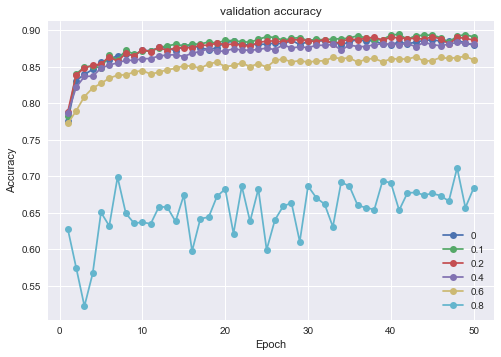

In [7]:
plot_result(hist_result, dropouts)

## Exercise 2: activation functions
How do different activation functions perform?

* sigmoid
* tanh
* relu
* elu

#### Report the following
* One figure that displays the validation loss versus the epoch number for each of the above. 


In [8]:
activations   = ['sigmoid','tanh','relu','elu']
hiddenNeurons = 100
epochs        = 50
batch_size    = 1000

In [9]:
X_train, X_test, Y_train, Y_test = getData()

In [10]:
def createModel_2(activat_func):
  tf.random.set_seed(0)
  model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[1].shape),
    # layer 1
    tf.keras.layers.Dense(hiddenNeurons, activation=activat_func),
    tf.keras.layers.Dropout(0.2),
    # layer 2
    tf.keras.layers.Dense(hiddenNeurons, activation=activat_func),
    tf.keras.layers.Dropout(0.2),
    # layer output
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])
  #define our optimizer
  sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name='SGD')
  #
  model1.compile(optimizer=sgd,
                loss='categorical_crossentropy', #need to define our loss function
                metrics=['accuracy'])
  
  history = model1.fit(X_train, Y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2)
  val_acc = history.history['val_accuracy']
  return history

In [11]:
result_2 = []
for activat_func in activations:
  print(f'activat_func: {activat_func}')
  result_2.append(createModel_2(activat_func))

activat_func: sigmoid
Epoch 1/50
48/48 [==============================] - 1s 13ms/step - loss: 1.9938 - accuracy: 0.2694 - val_loss: 1.3301 - val_accuracy: 0.6093
Epoch 2/50
48/48 [==============================] - 1s 11ms/step - loss: 1.1319 - accuracy: 0.5729 - val_loss: 0.8626 - val_accuracy: 0.6872
Epoch 3/50
48/48 [==============================] - 0s 10ms/step - loss: 0.8649 - accuracy: 0.6691 - val_loss: 0.7047 - val_accuracy: 0.7343
Epoch 4/50
48/48 [==============================] - 0s 10ms/step - loss: 0.7513 - accuracy: 0.7138 - val_loss: 0.6326 - val_accuracy: 0.7607
Epoch 5/50
48/48 [==============================] - 0s 10ms/step - loss: 0.6894 - accuracy: 0.7391 - val_loss: 0.5928 - val_accuracy: 0.7722
Epoch 6/50
48/48 [==============================] - 1s 11ms/step - loss: 0.6520 - accuracy: 0.7556 - val_loss: 0.5652 - val_accuracy: 0.7836
Epoch 7/50
48/48 [==============================] - 1s 12ms/step - loss: 0.6207 - accuracy: 0.7699 - val_loss: 0.5454 - val_accuracy

### Plot our results

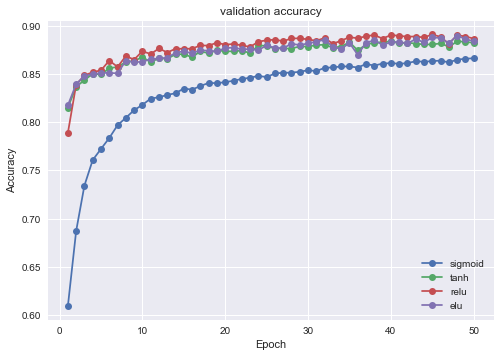

In [12]:
plot_result(result_2, activations)

## Exercise 3: How does momentum affect performance?
In this part, we will explore how using momentum affects training. Suppose that we were to use plain SGD without momentum (equivalent to setting $\beta=0$)

* $\beta=0$
* $\beta=0.8$
* $\beta=0.9$
* $\beta=0.99$


In [13]:
momentums      = [0,0.8,0.9,0.99]
hiddenNeurons = 100
epochs        = 50
batch_size    = 1000

In [14]:
X_train, X_test, Y_train, Y_test = getData()

In [15]:
def createModel_3(momen):
  tf.random.set_seed(0)
  model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=X_train[1].shape),
    # layer 1
    tf.keras.layers.Dense(hiddenNeurons, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # layer 2
    tf.keras.layers.Dense(hiddenNeurons, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    # layer output
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
  ])
  #define our optimizer
  sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=momen, nesterov=False, name='SGD')
  #
  model1.compile(optimizer=sgd,
                loss='categorical_crossentropy', #need to define our loss function
                metrics=['accuracy'])
  
  history = model1.fit(X_train, Y_train, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = 0.2)
  val_acc = history.history['val_accuracy']
  return history

In [16]:
result_3 = []
for momen in momentums:
  print(f'momentum: {momen}')
  result_3.append(createModel_3(momen))

momentum: 0
Epoch 1/50
48/48 [==============================] - 1s 12ms/step - loss: 1.4034 - accuracy: 0.5176 - val_loss: 0.8196 - val_accuracy: 0.7085
Epoch 2/50
48/48 [==============================] - 0s 10ms/step - loss: 0.8733 - accuracy: 0.6925 - val_loss: 0.6912 - val_accuracy: 0.7450
Epoch 3/50
48/48 [==============================] - 0s 10ms/step - loss: 0.7477 - accuracy: 0.7402 - val_loss: 0.6021 - val_accuracy: 0.7915
Epoch 4/50
48/48 [==============================] - 0s 10ms/step - loss: 0.6787 - accuracy: 0.7642 - val_loss: 0.5591 - val_accuracy: 0.8055
Epoch 5/50
48/48 [==============================] - 0s 10ms/step - loss: 0.6333 - accuracy: 0.7808 - val_loss: 0.5320 - val_accuracy: 0.8122
Epoch 6/50
48/48 [==============================] - 0s 10ms/step - loss: 0.6014 - accuracy: 0.7906 - val_loss: 0.5155 - val_accuracy: 0.8186
Epoch 7/50
48/48 [==============================] - 0s 10ms/step - loss: 0.5751 - accuracy: 0.8003 - val_loss: 0.4958 - val_accuracy: 0.8240
E

### Plot our results

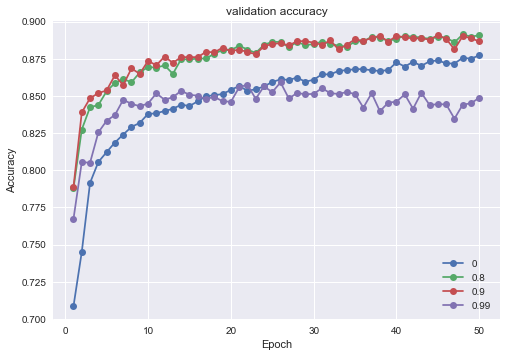

In [17]:
plot_result(result_3, momentums)

## Exercise 4: Design you own NN 
In this part, you will use what you learned to make a NN for the Fashion MNIST set.

Feel free to use:
* Any number of hidden layers 1-3
* Any layer sizes up to 1000. 
* Any activation function for your layers
* Any dropout rate
* Any learning rate, or use nesterov=True 
* Any batch size

However, keep the following constant
* epochs = 50
* validation_split = 0.2
* SGD optimizer

### Accuracy goal for full credit is >0.885 for the test data set


#### Report the following
* One figure that displays the training loss and validation loss versus the epoch number.  Include the final test loss which should be displayed as a horizontal line.
* The total wall-clock time used by the training algorithm.




In [18]:
X_train4, X_test4, Y_train4, Y_test4 = getData()

In [19]:
layer_size = 128
activation = 'relu'
epochs = 50
batch_size = int(1000/2)
dropout = 0.2

learning_rate = 0.1
momentum = 0.9
nesterov = False
validation_split = 0.2

In [20]:
tf.random.set_seed(0)
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=X_train[1].shape),
  tf.keras.layers.Dense(layer_size, activation=activation),
  tf.keras.layers.Dropout(dropout),
  tf.keras.layers.Dense(layer_size, activation=activation),
  tf.keras.layers.Dropout(dropout),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Softmax()
])
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov, name='SGD')
model4.compile(optimizer=sgd,
              loss='categorical_crossentropy', #need to define our loss function
              metrics=['accuracy'])

tstart = tf.timestamp()
history4 = model4.fit(X_train4, Y_train4, 
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split = validation_split) # Store Data for evaluation in history
total_time = tf.timestamp() - tstart
print("total time %3.3f seconds"%total_time)

Epoch 1/50
96/96 [==============================] - 1s 9ms/step - loss: 0.7816 - accuracy: 0.7154 - val_loss: 0.4868 - val_accuracy: 0.8218
Epoch 2/50
96/96 [==============================] - 1s 7ms/step - loss: 0.4863 - accuracy: 0.8241 - val_loss: 0.4142 - val_accuracy: 0.8482
Epoch 3/50
96/96 [==============================] - 1s 7ms/step - loss: 0.4372 - accuracy: 0.8414 - val_loss: 0.3927 - val_accuracy: 0.8577
Epoch 4/50
96/96 [==============================] - 1s 7ms/step - loss: 0.4181 - accuracy: 0.8484 - val_loss: 0.3780 - val_accuracy: 0.8625
Epoch 5/50
96/96 [==============================] - 1s 7ms/step - loss: 0.3967 - accuracy: 0.8543 - val_loss: 0.3617 - val_accuracy: 0.8673
Epoch 6/50
96/96 [==============================] - 1s 7ms/step - loss: 0.3810 - accuracy: 0.8607 - val_loss: 0.3585 - val_accuracy: 0.8681
Epoch 7/50
96/96 [==============================] - 1s 7ms/step - loss: 0.3770 - accuracy: 0.8612 - val_loss: 0.3535 - val_accuracy: 0.8694
Epoch 8/50
96/96 [==

### Plot our results

In [21]:
def plot_result_4(history,results_test):
    # Get training and validation histories
    training_acc = history.history['accuracy']
    val_acc      = history.history['val_accuracy']
    # Create count of the number of epochs
    epoch_count = range(1, len(training_acc) + 1)
    # Visualize loss history
    plt.plot(epoch_count, training_acc, 'b-o',label='Training')
    plt.plot(epoch_count, val_acc, 'r--',label='Validation')
    plt.plot(epoch_count, results_test[1]*np.ones(len(epoch_count)),'k--',label='Test')
    plt.legend()
    plt.title("Training and validation accuracy")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

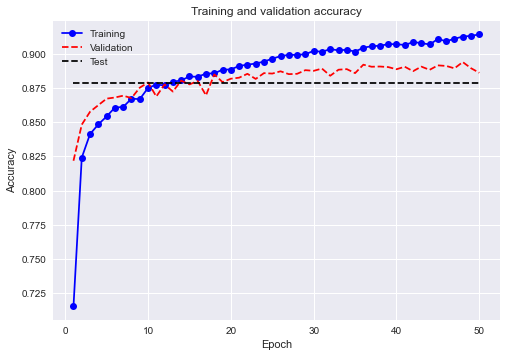

In [22]:
results_test4 = model4.evaluate(X_test, Y_test, batch_size=128,verbose=0)    
plot_result_4(history4, results_test4)
plt.show()

## Plot our results

## Exercise 5

The TensorFlow Playground [http://playground.tensorflow.org/](http://playground.tensorflow.org/) is a network simulator useful to get an idea of how it all works.  Take some time to explore the following.

* Click the **Run** button (top left), and notice how quickly it finds a good solution.  Try replacing the **tanh** activation function with the **ReLU**. What do you notice about the boundaries of the final solution?

  * when replacing with **ReLU**, the boundary is similar to a square while result of **tanh** has a curvy shape like a circle

* Run it several times, you'll notice it can get stuck in a local minima.

* Remove one of the hidden layer neurons to keep just two.  You'll notice the model is not capable of finding a good solution.  The model has too few parameters and underfits the training set.

* Select a different dataset and repeat the above.
  * With spiral dataset: the model is quite unstable even its test loss is 0.038 after 900 epochs
  * With exclusive or dataset: it easily reaches test loss of 0.001 after 600 epochs
  * With gaussian dataset: it almost gets to 0.001 test loss after only 100 epochs
 

#### your turn
Try to play with some of the model parameters 
* number of features
  * $X_1$ and $X_1^2$ or $X_2$ and $X_2^2$: the model create a strike boundary line instead of circular shape. The test loss is around 0.29 after 300 epochs
  * $X_1$ and $X_1X_2$ or $X_2$ and $X_1X_2$: the model create a star-shaped boundary. Test loss is aroung 0.17 after 1000 epochs. It converge quite fast
  * $\sin(X_1)$ and $sin(X_2)$: the model gets trapped in the local minimum. Test loss is aroung 0.49 after 1000 epochs.
  * The more feature I have, the faster the model converges and less test loss.
    * With all features, the model converges to test loss 0 after about 200 epochs. While it takes 400 epochs to converge to 0 (test loss) with 4 features.
* number of hidden layer neurons
  * With 1 hidden layer, the model's test loss reaches 0 after 2000 epochs
  * With 2 hidden layer, the model's test loss reaches 0 after just 500 epochs
  * With 3 hidden layer, the model converges faster: its test loss reaches 0 after just 350 epochs
* Activation: with 3 features $X_1$, $X_2$, and $X_2^2$ and 2 hidden layers, circle dataset, no regularization
  * Tanh: the model's test loss reaches 0 after just 500 epochs.
  * ReLU: the model's test loss reaches 0 after just 600 epochs.
  * Sigmoid: the model's test loss reaches 0.001 after around 1000 epochs.
  * Linear: this function is not suitable for circle dataset, so the test loss is around 0.272 after 500 epochs.
* Regularization: with 3 features $X_1$, $X_2$, and $X_2^2$ and 2 hidden layers, circle dataset, ReLU function
  * None: the models has test loss of 0 after just 400 epochs
  * L1 helps the model reduct test loss to 0 after 500 epochs
  * L2: the models has test loss of 0 after about 800 epochs
  
Give a few sentences describing what you've learned.

- From tests above, I believe that, number of features with give a better accuracy. ReLU runs quite well, so that is the reason we usually use it for trainning. The larger number of hidden layers also helps to convert faster


